In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

In [231]:
data = pd.read_csv('Chocolate Sales.csv')

In [232]:
data.head() # understanding what the dataset looks like

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [233]:
data['Date']=pd.to_datetime(data['Date']) # turning the 'Date' column values to date format

In [234]:
data['Country'].value_counts()

Australia      205
India          184
USA            179
UK             178
Canada         175
New Zealand    173
Name: Country, dtype: int64

Australia was the country with the most number of shippings. 
Let's see the country with the most number of boxes shipped

In [235]:
boxes_per_country= data.groupby('Country')[ 'Boxes Shipped'].sum()
boxes_per_country

Country
Australia      32647
Canada         31221
India          29470
New Zealand    26580
UK             30265
USA            26824
Name: Boxes Shipped, dtype: int64

Australians sure do love chocolate :) Let's make this data more visual-friendly:

Text(0.5, 1.0, 'Boxes shipped per country')

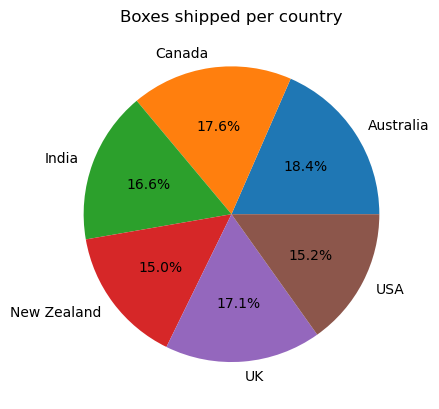

In [236]:
fig, ax = plt.subplots()
ax.pie(boxes_per_country,autopct='%1.1f%%', labels=boxes_per_country.index)
ax.set_title('Boxes shipped per country')

Let's now see which country has spent the most money in chocolates.

In [237]:
#Remove "$" and commas, then convert to float
data['Amount'] = (
    data['Amount']
    .str.replace('$', '', regex=False)  
    .str.replace(',', '', regex=False)  
    .astype(float) 
)

In [238]:
money_country= data.groupby('Country')['Amount'].sum().sort_values(ascending=False)
money_country

Country
Australia      1137367.0
UK             1051792.0
India          1045800.0
USA            1035349.0
Canada          962899.0
New Zealand     950418.0
Name: Amount, dtype: float64

Text(0.5, 1.0, 'Money spent per country')

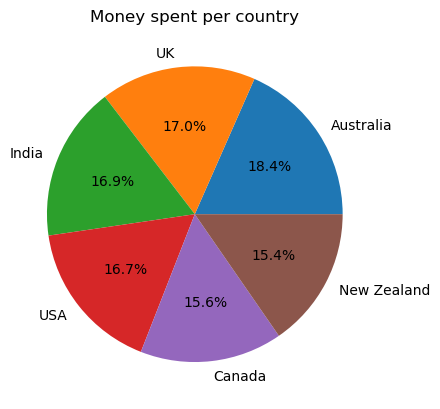

In [239]:
fig, ax = plt.subplots()
ax.pie(money_country,autopct='%1.1f%%', labels=money_country.index)
ax.set_title('Money spent per country')

Australia is unstopabble apparently! Let's see how the number of shippments an the money spent are connected

In [240]:
boxes_per_country = boxes_per_country.sort_index()
money_country = money_country.sort_index()

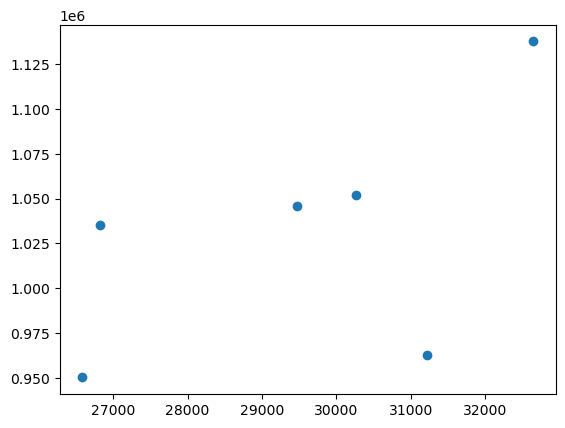

In [241]:
plt.scatter(boxes_per_country, money_country)

As we can see, there's not a very interesting correlation between the number of boxes bought in each country and the money spent. That suggests some boxes may be more expensive than others and that, although some countries may have a lower number of shipments, they may be more profitable to the company. 


Is there any day or month where the number of sales was bigger?

In [242]:
sales_day = data.groupby('Date')['Amount'].sum()

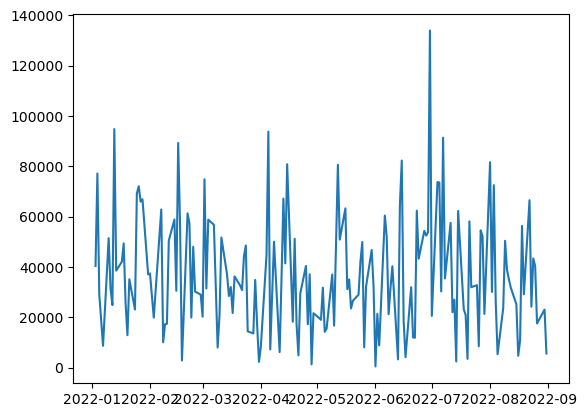

In [243]:
plt.plot(sales_day)

Resultados não são muito claros, vamos fazer os cálculos por mês.

In [244]:
data['Month']= data['Date'].dt.month
data['Day']= data['Date'].dt.day 
#created a new column with the month/day correspondent to each sale

<AxesSubplot:xlabel='Month'>

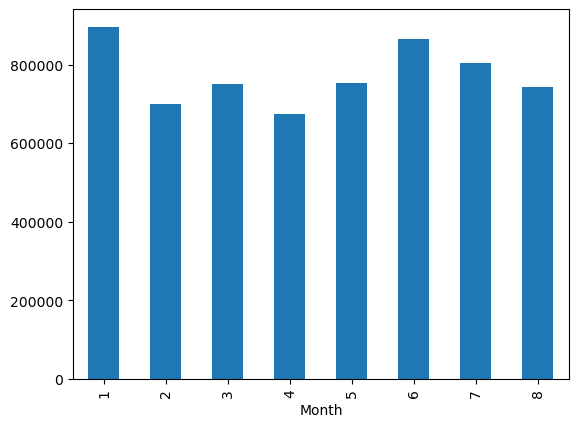

In [245]:
sales_month = data.groupby('Month')['Amount'].sum()

sales_month.plot.bar()

<AxesSubplot:xlabel='Day'>

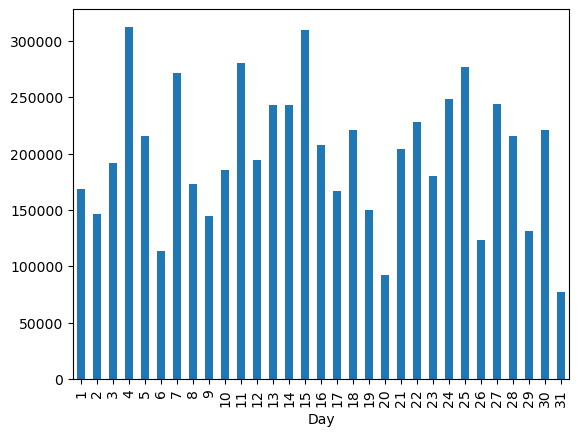

In [246]:
data.groupby('Day')['Amount'].sum().plot.bar()

The sales for each month don't seem to be that different. 
Some days do seem to present much inferior sales in comparison with others, which may be improved with specific offers on orders made on those days.

Let's now study the types of products sold:

<AxesSubplot:xlabel='Product'>

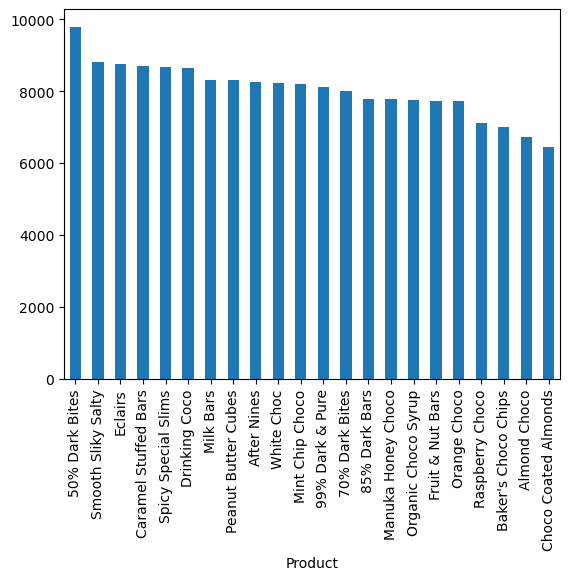

In [247]:
products= data.groupby('Product')['Boxes Shipped'].sum().sort_values(ascending=False)

products.plot.bar()

We can clearly see that '50% Dark Bites' is the most popular product, beating the number of boxes sold. 

Let's now see how much each box of each product cost and if it changed in the months we have access to. 

In [248]:
data['Price per box']= data['Amount'] / data['Boxes Shipped']

In [249]:
price_box=data.sort_values(by='Product')
price_box['Price per box']= price_box['Amount'] / price_box['Boxes Shipped']
price_box.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month,Day,Price per box
712,Barr Faughny,New Zealand,50% Dark Bites,2022-06-23,4557.0,308,6,23,14.795455
472,Mallorie Waber,India,50% Dark Bites,2022-05-31,588.0,139,5,31,4.230216
474,Van Tuxwell,India,50% Dark Bites,2022-05-13,5103.0,129,5,13,39.558140
174,Jehu Rudeforth,Australia,50% Dark Bites,2022-01-14,5194.0,418,1,14,12.425837
951,Van Tuxwell,New Zealand,50% Dark Bites,2022-07-11,3626.0,10,7,11,362.600000


<AxesSubplot:>

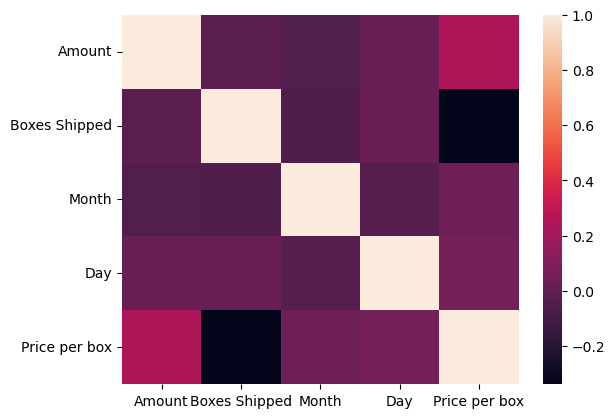

In [ ]:
sns.heatmap(price_box.corr()) 

As we can see, there's no strong correlation between the price per box and the numer of boxes bought/the amount spent or the time the shipment was made. 

Could there be a relatin between the price and the country? Let's see if that's the case for the product '50% Dark Bites':

In [259]:
price_box.value_counts('Country').index

Index(['Australia', 'India', 'USA', 'UK', 'Canada', 'New Zealand'], dtype='object', name='Country')

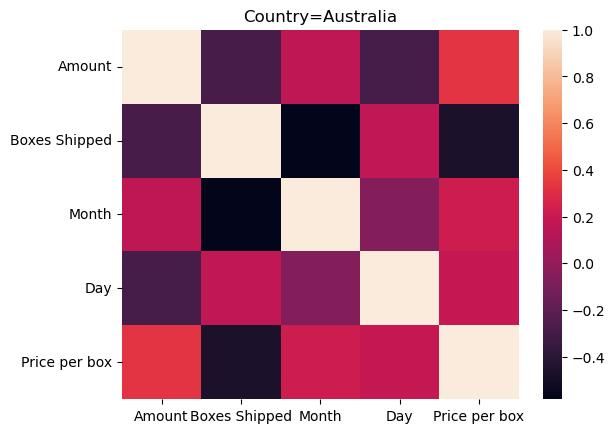

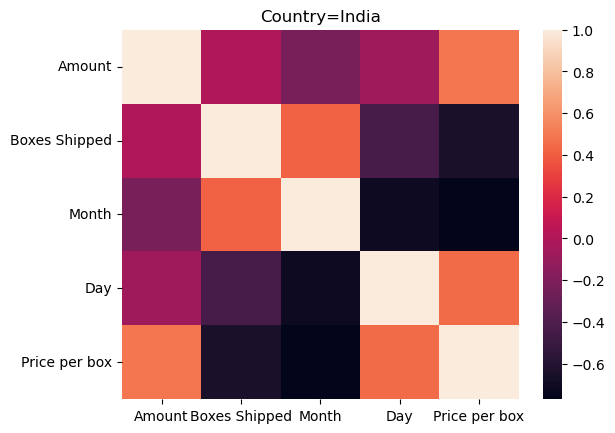

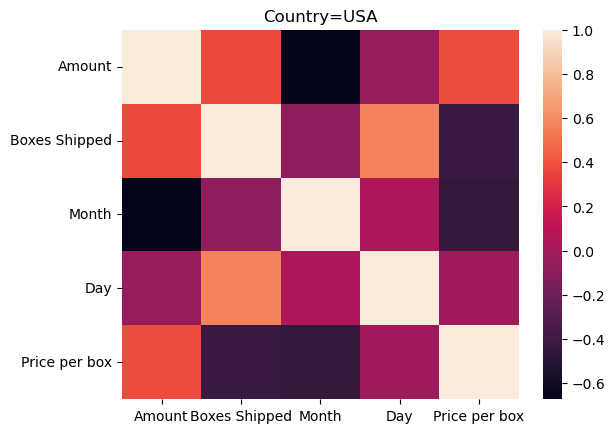

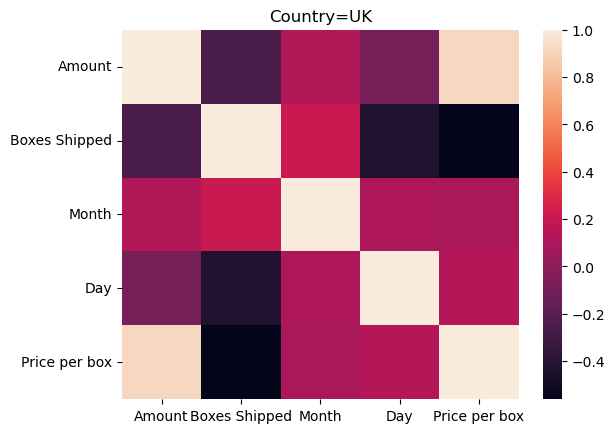

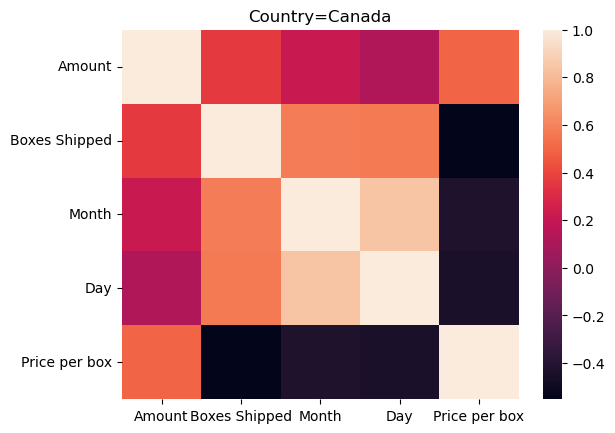

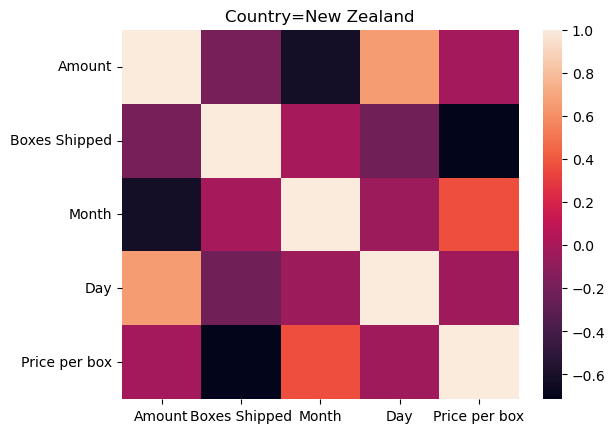

In [270]:
countries= price_box.value_counts('Country')
for country in countries.index:
    price_country= price_box.loc[(price_box['Country']== country)& (price_box['Product']== '50% Dark Bites')]
    sns.heatmap(price_country.corr())
    plt.title(f'Country={country}')
    plt.show()
    

Taking a look at the correlation in each country, we can see a bigger connection between the amount spent and the price pe rbox, but it still isn't very significant for most countries. So, there's no relation between the country the order was made (and the amountspent) and the box prices. 
Let's now analise the performance of each seller. 

<AxesSubplot:xlabel='Sales Person'>

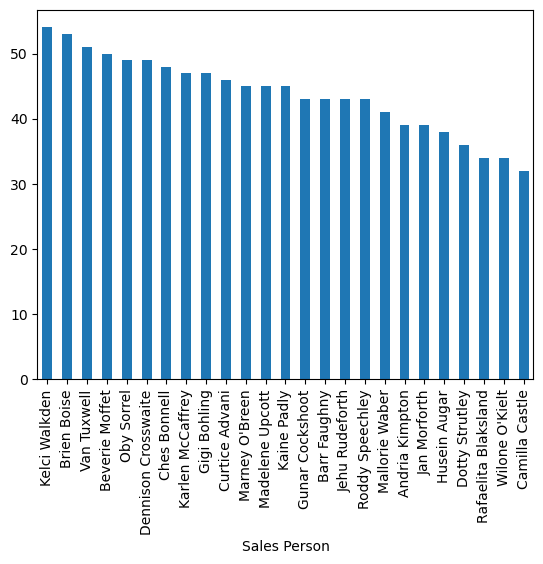

In [276]:
data.value_counts('Sales Person').plot.bar()


Now let's see which seller brought the most amount spent in shippments:

<AxesSubplot:xlabel='Sales Person'>

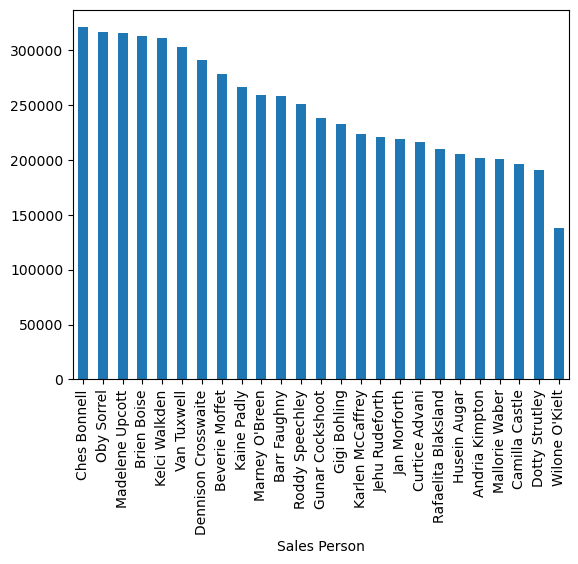

In [282]:
data.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False).plot.bar()

So there seems to be a difference between the number of sales a worker as made and the money they brought to the company! So it's always better to check :)